In [1]:
# Downloading the Dataset from Kaggle by using opendatasets api
#!pip install opendatasets --upgrade --quiet
#import opendatasets as od

In [2]:
#download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
#od.download(download_url)

In [3]:
# Import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('us-accidents/US_Accidents_Dec21_updated.csv')

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
# splitting Start_Time varible by date and time, 
df[['Date','Time']] = df['Start_Time'].str.split(expand=True)

In [8]:
# then splitting date into month, year and day 
df[['Year', 'Month', 'Day']] = df['Date'].str.split(pat = "-", expand=True) 
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Time,Year,Month,Day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,Night,Night,Night,Night,2016-02-08,00:37:08,2016,02,08
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,Night,Night,Night,Night,2016-02-08,05:56:20,2016,02,08
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,Night,Night,Night,Day,2016-02-08,06:15:39,2016,02,08
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,Night,Night,Day,Day,2016-02-08,06:51:45,2016,02,08
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,Day,Day,Day,Day,2016-02-08,07:53:43,2016,02,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,Day,Day,Day,Day,2019-08-23,18:03:25,2019,08,23
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,Day,Day,Day,Day,2019-08-23,19:11:30,2019,08,23
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,Day,Day,Day,Day,2019-08-23,19:00:21,2019,08,23
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,Day,Day,Day,Day,2019-08-23,19:00:21,2019,08,23


In [9]:
# deleting data from years 2016 and 2017, then counting number of values
# df is final cleaned data frame
df_final = df[(df['Year'] != '2016') & (df['Year'] != '2017')]
df_final['Year'].value_counts()

2021    1511745
2020     625864
2019     258615
2018     163176
Name: Year, dtype: int64

In [10]:
#creating databases for variables needed for each question: 
# Q1
q1_df = df_final[['ID','Year']]

# Q2
q2_df = df_final[['ID','Precipitation(in)','Temperature(F)', 'Visibility(mi)', 'Weather_Condition']]

# Q3
q3_df = df_final[['ID','State', 'City', 'Timezone', 'End_Lat', 'End_Lng','Year']]

# Q4
q4_df = df_final[['ID','Time','Sunrise_Sunset']]

In [ ]:
# drop rows containing missing values
# Q1 - Trends of accident before/during pandemic
q1_df_cleaned = q1_df.dropna()
q1_df_cleaned
q1_df_cleaned.to_csv("Q1_Year_data.csv")

In [11]:
# drop rows containing missing values
# Q2 - Effect of environmental factors on the trend of accidents
q2_df_cleaned = q2_df.dropna()
q2_df_cleaned
q2_df_cleaned.to_csv("Q2_Weather_data.csv")

In [ ]:
# drop rows containing missing values
# Q3 - Accidents by regions (cities, timezone)
q3_df_cleaned = q3_df.dropna()
q3_df_cleaned
q3_df_cleaned.to_csv("Q3_location_data.csv")

In [ ]:
# drop rows containing missing values
# Q4 - Did time of day increase the likelihood of accidents?
q4_df_cleaned = q4_df.dropna()
q4_df_cleaned
q4_df_cleaned.to_csv("Q4_Time_data.csv")

In [ ]:
#plotting pie chart for q1
#creating labels
q1_df_cleaned["Year"].value_counts().plot(kind='pie')

In [ ]:
q2_df_cleaned

In [12]:
q2_df_cleaned.rename(columns={'Precipitation(in)': 'Precipitation', 'Temperature(F)': 'Temperature',
                   "Visibility(mi)": "Visibility"}, inplace=True)

C:\Users\ramya\AppData\Local\Temp\ipykernel_9400\872205001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df_cleaned.rename(columns={'Precipitation(in)': 'Precipitation', 'Temperature(F)': 'Temperature',


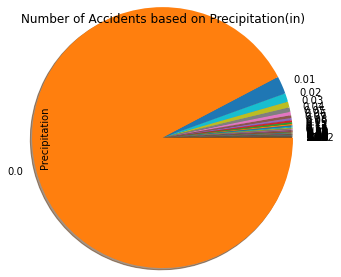

In [13]:
#precipitation vs. number of accidents
q2_df_cleaned.Precipitation.value_counts().sort_values().plot(kind = 'pie', radius=1.5, shadow=True)
#fig.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Number of Accidents based on Precipitation(in)")
plt.show()

In [14]:
weather_cond = q2_df_cleaned.Weather_Condition.value_counts()
weather_cond.head(25)

Fair                       1052686
Cloudy                      337216
Mostly Cloudy               288029
Partly Cloudy               196813
Light Rain                  112798
Light Snow                   38492
Fog                          37727
Haze                         29352
Rain                         26299
Fair / Windy                 14529
Heavy Rain                   10546
Thunder in the Vicinity       6805
Cloudy / Windy                6564
T-Storm                       6434
Mostly Cloudy / Windy         6195
Overcast                      6151
Smoke                         6006
Thunder                       5953
Light Drizzle                 5842
Light Rain with Thunder       5247
Snow                          4550
Wintry Mix                    3833
Partly Cloudy / Windy         3779
Heavy T-Storm                 3569
Light Rain / Windy            3309
Name: Weather_Condition, dtype: int64

Text(0, 0.5, 'Number of Accidents')

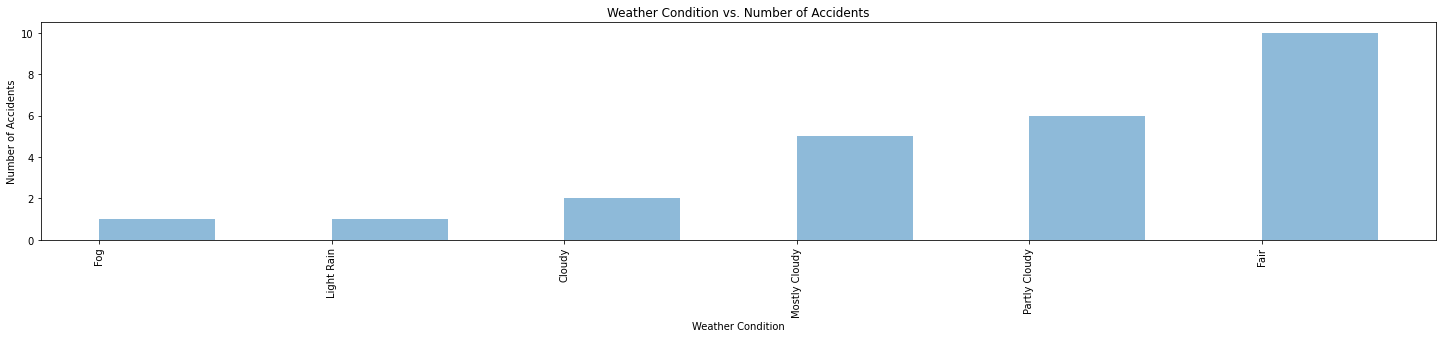

In [15]:
#weather condition
q2_df_cleaned.Weather_Condition.head(25).value_counts().sort_values().plot(kind = 'bar', figsize=(25,4), 
                                                                           alpha=0.5, align="edge")
plt.title("Weather Condition vs. Number of Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")

Text(0, 0.5, 'Number of Accidents')

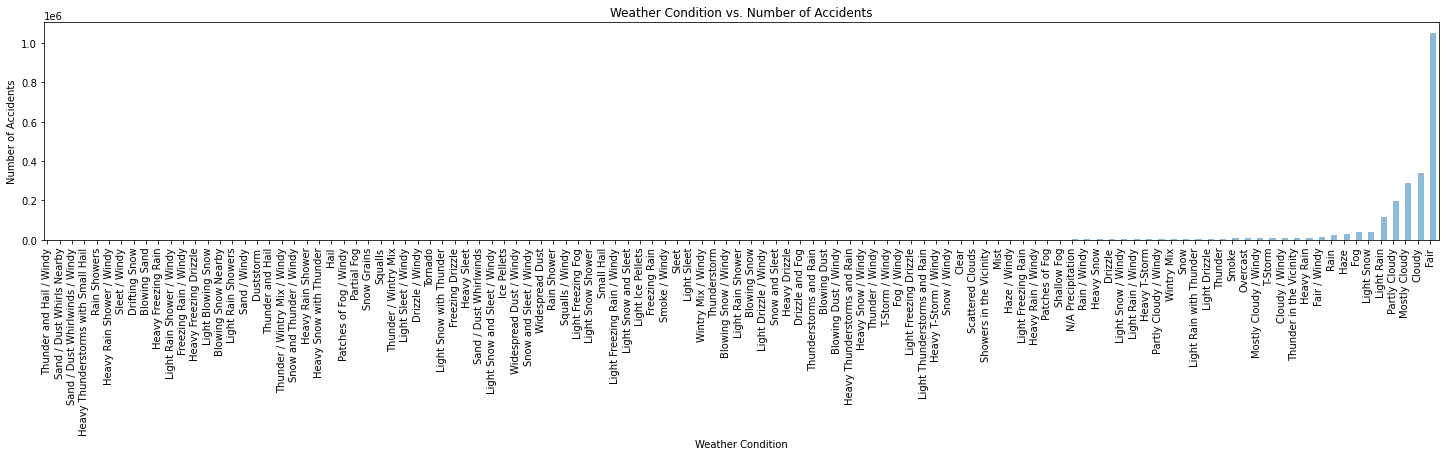

In [16]:
#weather condition
q2_df_cleaned.Weather_Condition.value_counts().sort_values().plot(kind = 'bar', figsize=(25,4), 
                                                                           alpha=0.5, align="edge")
plt.title("Weather Condition vs. Number of Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")

Text(0.5, 1.0, 'Number of Accidents Based on Visibility(mi)')

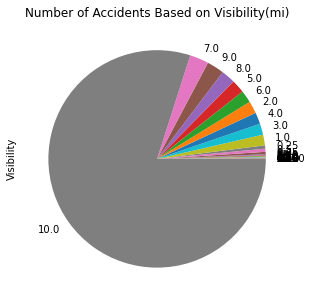

In [17]:
#visibility
q2_df_cleaned.Visibility.value_counts().sort_values().plot(kind = 'pie', figsize=(25,5))
plt.title("Number of Accidents Based on Visibility(mi)")

In [20]:
#temperature
temp = q2_df_cleaned.Temperature.value_counts()
temp1=temp.head(25)

Text(0, 0.5, 'Number of Accidents')

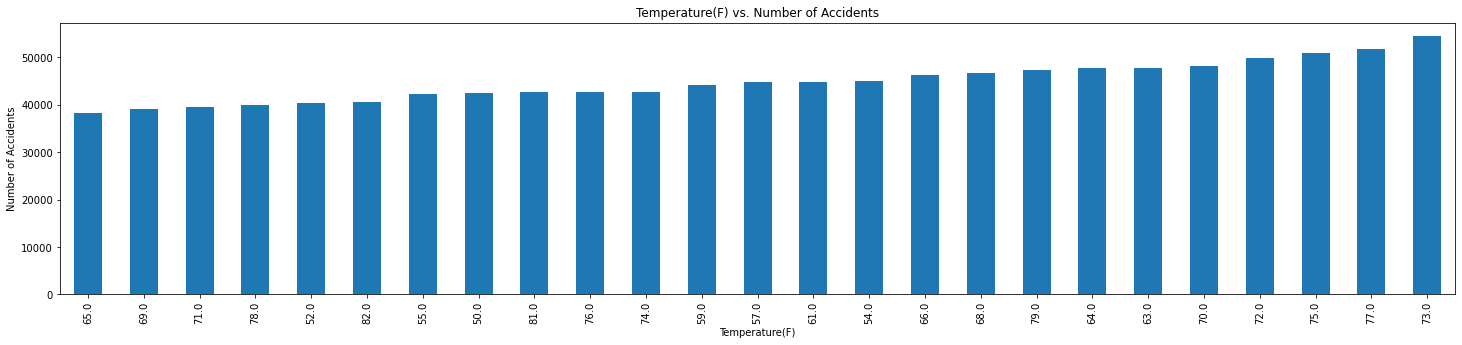

In [21]:
temp1.sort_values().plot(kind = 'bar', figsize=(25,5))
plt.title("Temperature(F) vs. Number of Accidents")
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Accidents")

In [ ]:
x_axis = [q2_df_cleaned["Temperature"]]
y_axis = np.arange(len(q2_df_cleaned["Temperature"]))
q2_df_cleaned.plot(kind = 'scatter', figsize=(25,5),marker="o", facecolors="red", edgecolors="black")